# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.

Выполнил студент гр. 3385 Евдокимов Максим Юрьевич. Вариант №5.

## Цель работы

Овладеть навыками работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения
и анализа сетей аффилированности.

## Основные теоретические положения

### Групповые характеристики сетей

#### Централизация по степени
$$C_D = \frac{\sum_i \hat{C}_D - C_D(n_i)}{(g-1)(g-2)}$$
#### Централизация по близости
$$C_C = \frac{\sum_i \hat{C}_C - C_C(n_i)}{(g-1)(g-2)/(2g-3)}$$
#### Централизация по посредничеству
$$C_B = \frac{\sum_i \hat{C}_B - C_B(n_i)}{g-1}$$

### Алгоритмы обнаружения сообществ
#### Spinglass
Задача поиска сообществ в сети сводится к задаче нахождения оптимального состояния некоторой физической системы. Аналогия строится со спиновыми стеклами, каждый узел становится магнитом, а направление магнитного момента - принадлежностью к группе. Оптимизация такой системы порождает деление сети на сообщества.
#### Walktrap
Решает задачу поиска сообществ в сети с помощью случайных обходов графа. Главная идея - случайные обходы попадают в ловушку внутри плотных сообществ сети.
#### Label propagation
Акторам присуждается метка, затем в ходе работы алгоритма некоторые акторы перенимают наиболее частую метку от своих соседей. В итоге метки разделяют сеть на сообщества.


## Постановка задачи

С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей на предмет подгрупп. Провести
исследование сети аффилированности CEO. Полученные результаты содержательно проинтерпретировать.


## Выполнение работы

### 0. Подключение библиотеки

In [1]:
install.packages("igraph")
library(igraph)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




### 1. Из файла florentine_business.csv (для нечётных вариантов) и файла florentine_marital.csv (для чётных вариантов) извлечь социоматрицу с помощью соответствующих функций. Отобразить сеть с помощью одного из алгоритмов укладки.


Warning message:
“The `adjmatrix` argument of `graph_from_adjacency_matrix()` must be symmetric
with mode = "undirected" as of igraph 1.6.0.
ℹ Use mode = "max" to achieve the original behavior.”
  [[ suppressing 16 column names ‘Acciaiuoli’, ‘Albizzi’, ‘Barbadori’ ... ]]



16 x 16 sparse Matrix of class "dgCMatrix"
                                            
Acciaiuoli   . . . . . . . . . . . . . . . .
Albizzi      . . . . . . . . . . . . . . . .
Barbadori    . . . . 1 1 . . 1 . 1 . . . . .
Bischeri     . . . . . . 1 1 . . 1 . . . . .
Castellani   . . 1 . . . . 1 . . 1 . . . . .
Ginori       . . 1 . . . . . 1 . . . . . . .
Guadagni     . . . 1 . . . 1 . . . . . . . .
Lamberteschi . . . 1 1 . 1 . . . 1 . . . . .
Medici       . . 1 . . 1 . . . 1 . . . 1 . 1
Pazzi        . . . . . . . . 1 . . . . . . .
Peruzzi      . . 1 1 1 . . 1 . . . . . . . .
Pucci        . . . . . . . . . . . . . . . .
Ridolfi      . . . . . . . . . . . . . . . .
Salviati     . . . . . . . . 1 . . . . . . .
Strozzi      . . . . . . . . . . . . . . . .
Tornabuoni   . . . . . . . . 1 . . . . . . .

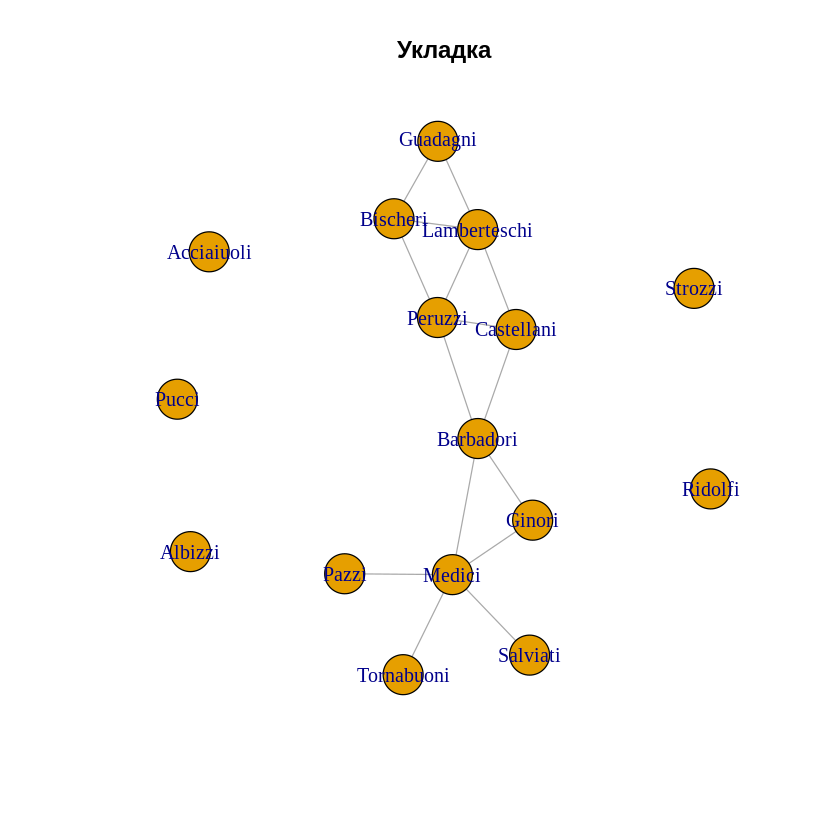

In [2]:
table <- read.csv('/florentine_business.csv', skip = 1)
graph <- igraph::graph_from_adjacency_matrix(as.matrix(table), mode = "undirected")
network <- igraph::as_adjacency_matrix(graph)
network
plot(graph, main = "Укладка", layout = layout_with_fr)

### 2. Выявить точки сочленения и мосты сети. Подтвердить свои догадки с помощью соответствующих функций. Построить графики сети, на котором выделены точки сочленения и мосты.

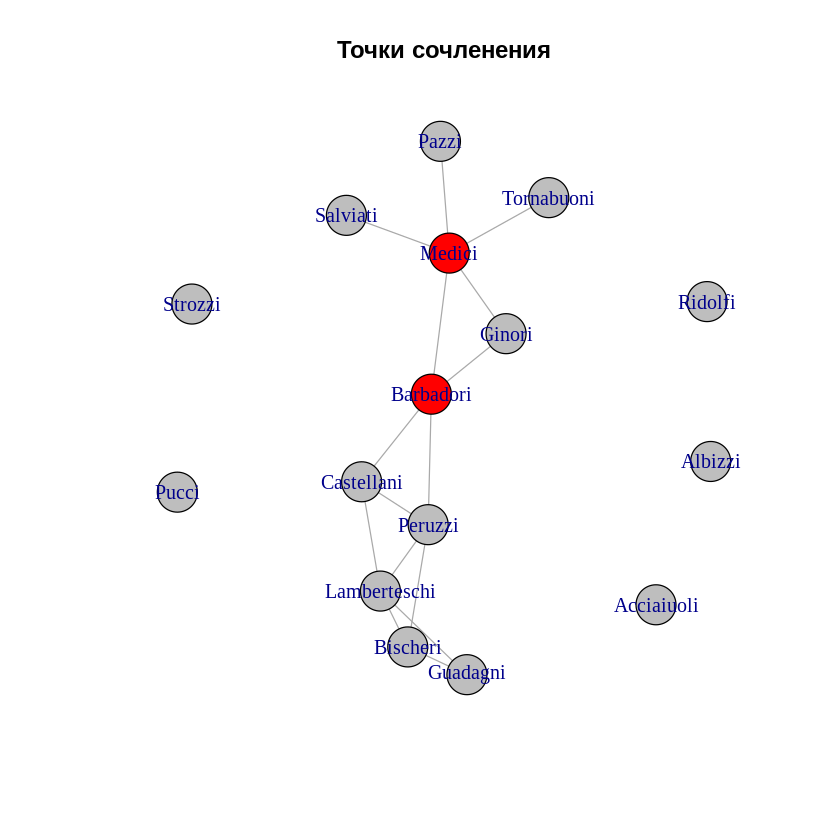

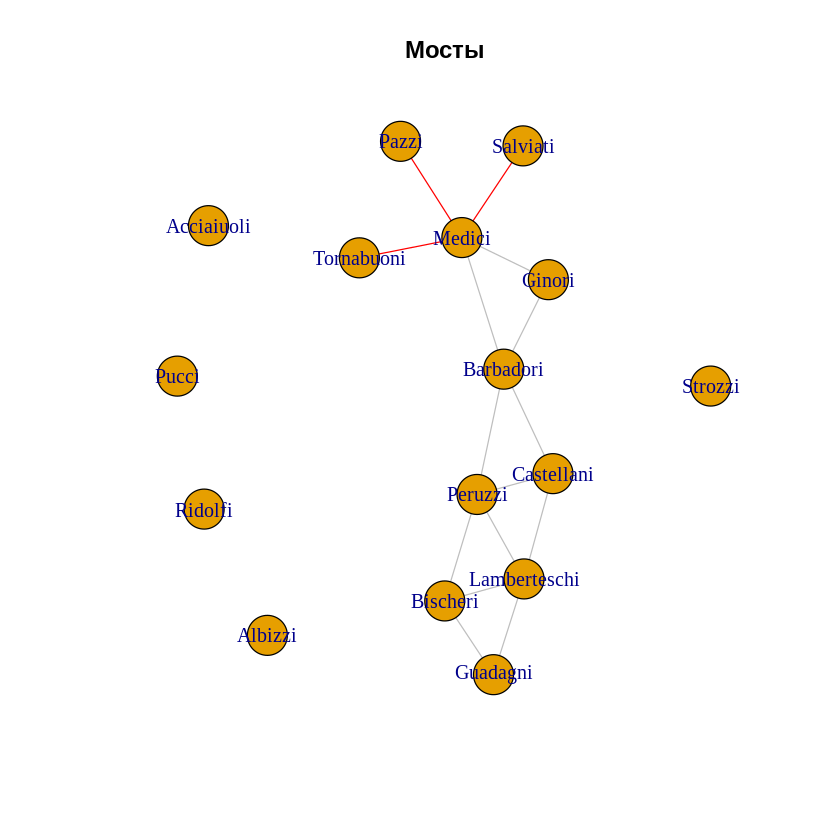

In [3]:
cut <- igraph::articulation_points(graph)

vertex_colors <- rep("gray", igraph::vcount(graph))
vertex_colors[cut] <- "red"

plot(graph,
     vertex.color = vertex_colors,
     main = "Точки сочленения")

brigdes <- igraph::bridges(graph)

egdes_colors <- rep("gray", igraph::ecount(graph))
egdes_colors[brigdes] <- "red"

plot(graph,
     edge.color = egdes_colors,
     main = "Мосты")

### 3. Вычислить значение централизации для каждой меры. Сделать выводы

In [6]:
isolated_vertices <- which(igraph::degree(graph) == 0)
mod_net <- delete_vertices(graph, isolated_vertices)

cat("C_D =", round(centr_degree(mod_net)$centralization, 4), "\n")
cat("C_С =", round(centralization.closeness(mod_net)$centralization, 4), "\n")
cat("C_B =", round(centralization.betweenness(mod_net)$centralization, 4), "\n")

C_D = 0.2273 
C_С = 0.3535 
C_B = 0.4422 


**Вывод:** имеем:

- Относительно низкое значение $C_D$. Это говорит о том, что в сети нет единого центра, с котором напрямую взаимодействует большое количество акторов сети, однако неткоторая неравномерность имеется, например существуют 3 актора 4 степени и 4 актора 3 степени.
- Относительно низкое значение $C_C$. Не сущвествует фактического центра сети. Значения близости распределены по большей части равномерно, хотя некоторые наиболее центральные акторы явно выделяются.
- Среднее значение $C_B$. Семья Barbadori (и Medici) является значимой точкой сочленения, поэтому создает неравномерность в значениях посреднечества.

### 4. Исследовать данную сеть на предмет подгрупп с помощью 𝑘-ядер. Указать какие подгруппы получились. Сделать выводы.

core
0 1 2 
5 3 8 

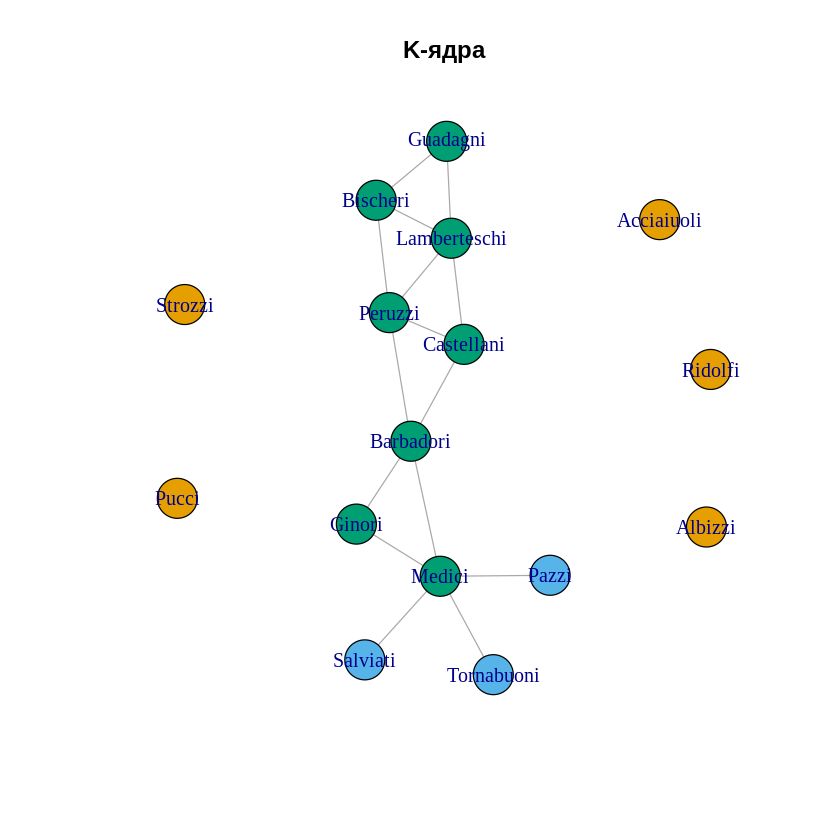

In [7]:
core <- coreness(graph)
table(core)

colored <- set_vertex_attr(graph, name = "color", value = core + 1)
plot(colored, main = "K-ядра")

**Выводы:** Имеем группы:

1. Группа изолированных вершин.
2. Группа вершин 1 степени. Они имеют наиболее слабые связи в сети, находятся на ее краю
3. Все остальные вершины, они составляют основную, связную часть сети.

### 5. С помощью библиотеки igraph исследовать алгоритмы обнаружения сообществ в зависимости от номера варианта.
Алгоритмы: Spinglass, Walktrap, Label propagation

Кратко объяснить суть каждого алгоритма. Вывести значение модулярности и отобразить полученные сообщества. Сделать выводы.

#### Spinglass
Задача поиска сообществ в сети сводится к задаче нахождения оптимального состояния некоторой физической системы. Аналогия строится со спиновыми стеклами, каждый узел становится магнитом, а направление магнитного момента - принадлежностью к группе. Оптимизация такой системы порождает деление сети на сообщества.
#### Walktrap
Решает задачу поиска сообществ в сети с помощью случайных обходов графа. Главная идея - случайные обходы попадают в ловушку внутри плотных сообществ сети.
#### Label propagation
Акторам присуждается метка, затем в ходе работы алгоритма некоторые акторы перенимают наиболее частую метку от своих соседей. В итоге метки разделяют сеть на сообщества.

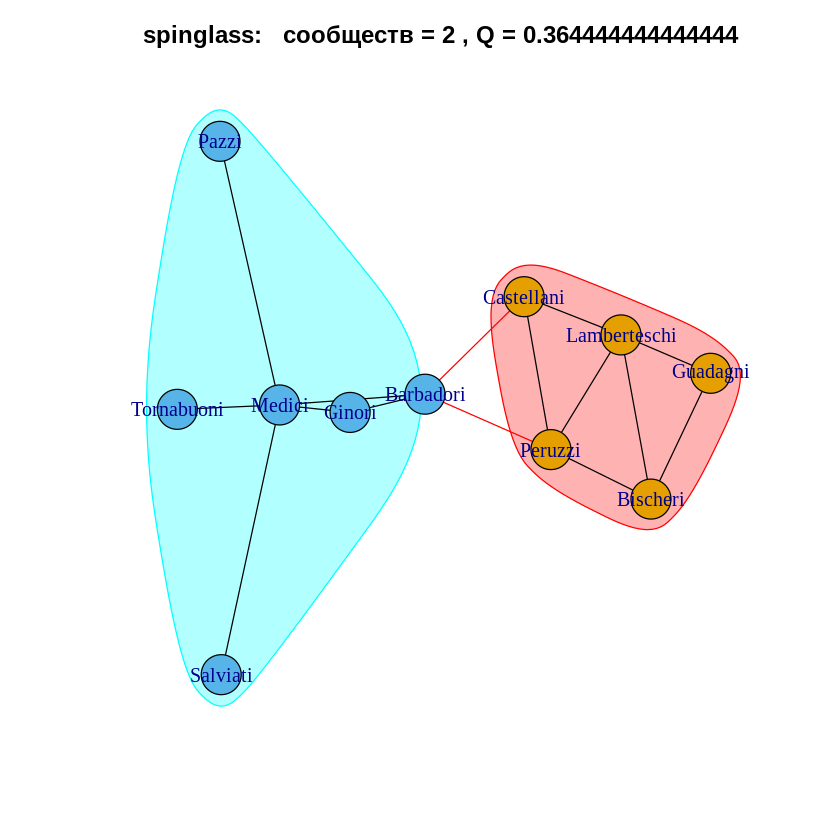

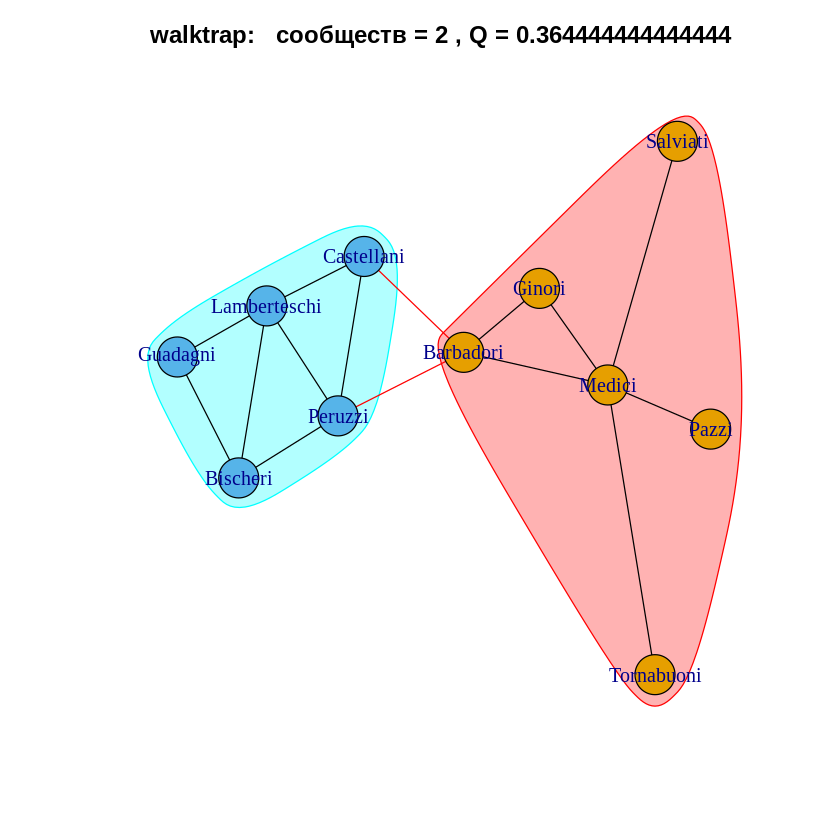

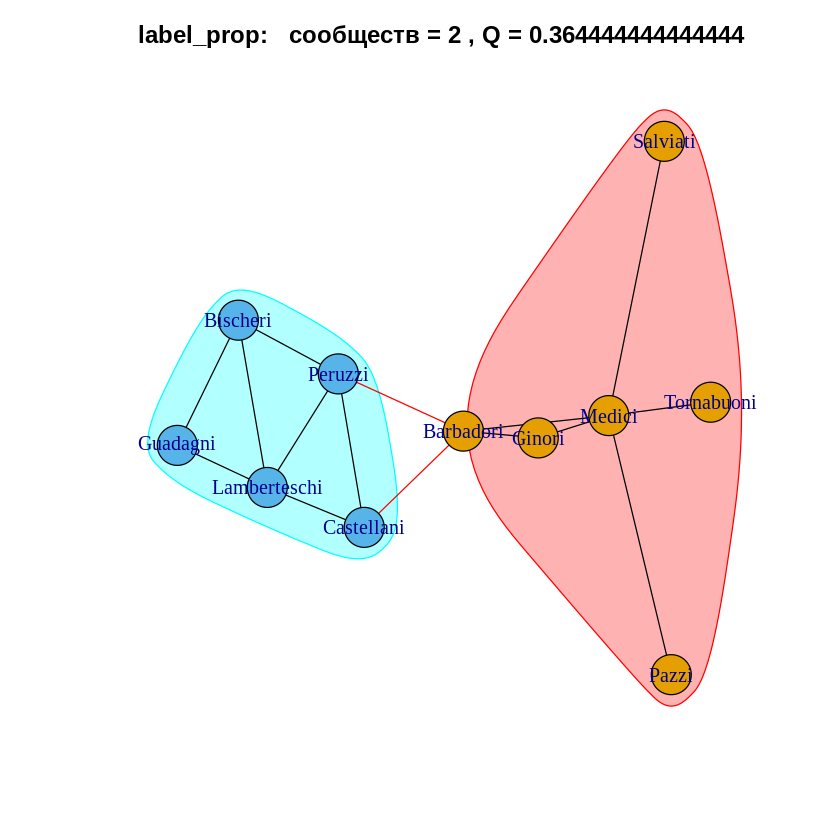

In [11]:
spinglass <- cluster_spinglass(mod_net)
walktrap <- cluster_walktrap(mod_net)
label_prop <- cluster_label_prop(mod_net)

ic_str <- paste("spinglass:   сообществ =", length(spinglass), ", Q =", modularity(spinglass), "\n")
lc_str <- paste("walktrap:   сообществ =", length(walktrap), ", Q =", modularity(walktrap), "\n")
oc_str <- paste("label_prop:   сообществ =", length(label_prop), ", Q =", modularity(label_prop), "\n")

plot(spinglass, mod_net, main = ic_str)
plot(walktrap, mod_net, main = lc_str)
plot(label_prop, mod_net, main = oc_str)

**Вывод:** все три алгоритма выделели практически одинаковые сообщества. Спорной является лишь семья Barbadori, которая связывает две разделенные части сети. Значение модулярности примерно равно 1/3.

### 6. Из файла ceo.csv извлечь матрицу инцидентности с помощью соответствующих функций. Отобразить полученную матрицу.


41 x 41 sparse Matrix of class "dgCMatrix"
                                                                               
 [1,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1 1 . . . . 1 . .
 [2,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1 . 1 . 1 . . . .
 [3,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1 . . . . . . . .
 [4,] . . . . . . . . . . . . . . . . . . . . . . . . . . . 1 1 . . . . . . . .
 [5,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1 . . . . . . . .
 [6,] . . . . . . . . . . . . . . . . . . . . . . . . . . . 1 1 . . . . . . . .
 [7,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1 1 . . . . . 1 1
 [8,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1 . . 1 . . 1 .
 [9,] . . . . . . . . . . . . . . . . . . . . . . . . . . 1 . . 1 . . . 1 . 1 .
[10,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1 . . . . . 1 . .
[11,] . . . . . . . . . . . . . . . . . . . . . . . . . . . 1 1 . . . . . 1 .

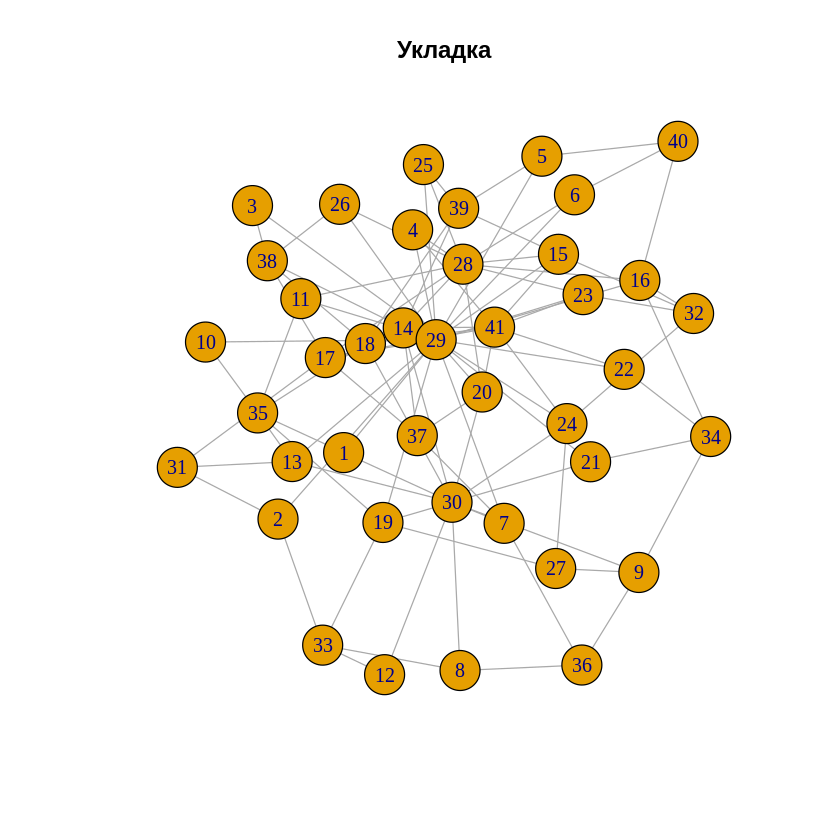

In [12]:
table2 <- read.csv('/ceo.csv', header = FALSE,
                 skip = 9)
graph2 <- igraph::graph_from_biadjacency_matrix(as.matrix(table2))
network2 <- igraph::as_adjacency_matrix(graph2)
network2
plot(graph2, main = "Укладка", layout = layout_with_fr)

### 7. Отобразить сеть в виде биграфа.


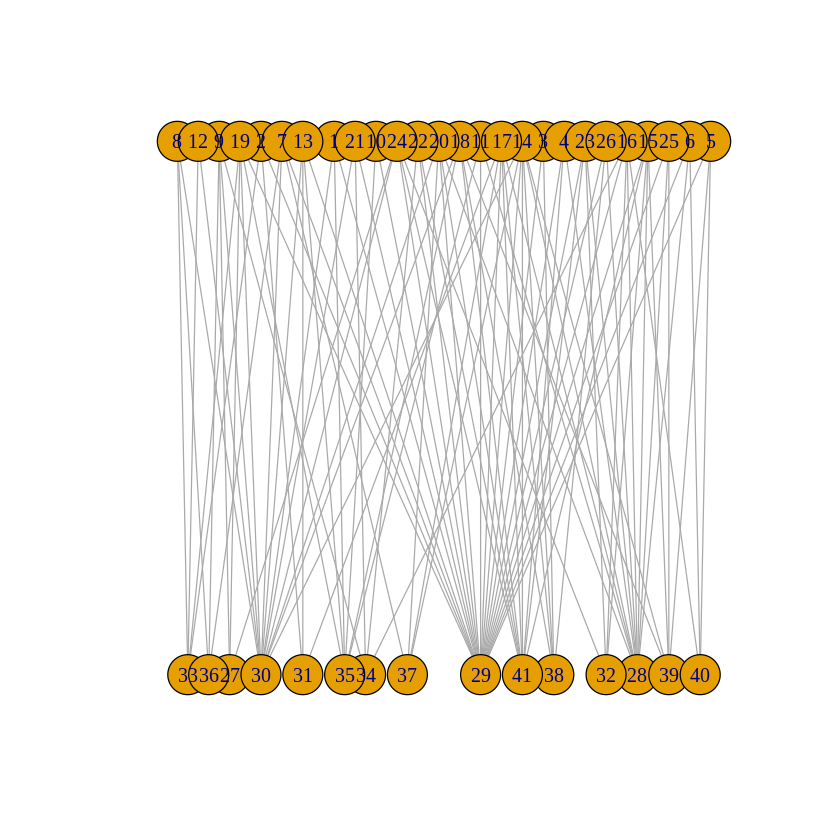

In [13]:
plot(graph2, layout=layout.bipartite)

### 8. Представить сеть аффилированности в виде двух одномодальных сетей: сеть совместного участия акторов и сеть перекрытия событий. Представить полученные сети в виде матриц и взвешенных графов. Сделать выводы.


0,1,1,1,1,1,2,1,1,2,⋯,1,2,3,2,2,1,1,2,1,1
1,0,1,1,1,1,1,1,0,1,⋯,2,0,2,1,1,1,1,1,1,1
1,1,0,1,1,1,1,0,0,1,⋯,2,1,1,1,1,1,1,1,1,2
1,1,1,0,1,2,1,0,0,1,⋯,3,1,1,3,1,2,3,2,2,2
1,1,1,1,0,2,1,0,0,1,⋯,1,1,1,1,1,1,1,1,2,1
1,1,1,2,2,0,1,0,0,1,⋯,2,0,1,2,1,1,2,1,2,2
2,1,1,1,1,1,0,2,2,1,⋯,2,1,2,3,2,1,1,2,1,1
1,1,0,0,0,0,2,0,2,0,⋯,0,1,2,1,1,0,0,1,0,0
1,0,0,0,0,0,2,2,0,0,⋯,0,1,2,1,2,1,0,2,0,0
2,1,1,1,1,1,1,0,0,0,⋯,1,1,2,1,1,1,1,1,1,1
2,1,1,2,1,2,1,0,0,2,⋯,2,1,2,2,1,1,2,1,2,2


0,0,2,3,0,1,1,1,1,1,0,0,0,0,1
0,0,11,2,1,3,0,1,1,0,3,3,3,2,6
2,11,0,8,3,4,2,3,5,1,4,4,4,3,8
3,2,8,0,1,1,3,2,4,3,3,2,2,0,4
0,1,3,1,0,0,1,0,1,0,1,1,0,0,1
1,3,4,1,0,0,0,1,0,0,0,0,1,1,3
1,0,2,3,1,0,0,0,1,1,0,0,0,0,0
1,1,3,2,0,1,0,0,0,1,0,0,0,1,1
1,1,5,4,1,0,1,0,0,0,0,1,1,0,1
1,0,1,3,0,0,1,1,0,0,1,0,0,0,0
0,3,4,3,1,0,0,0,0,1,0,2,1,0,3


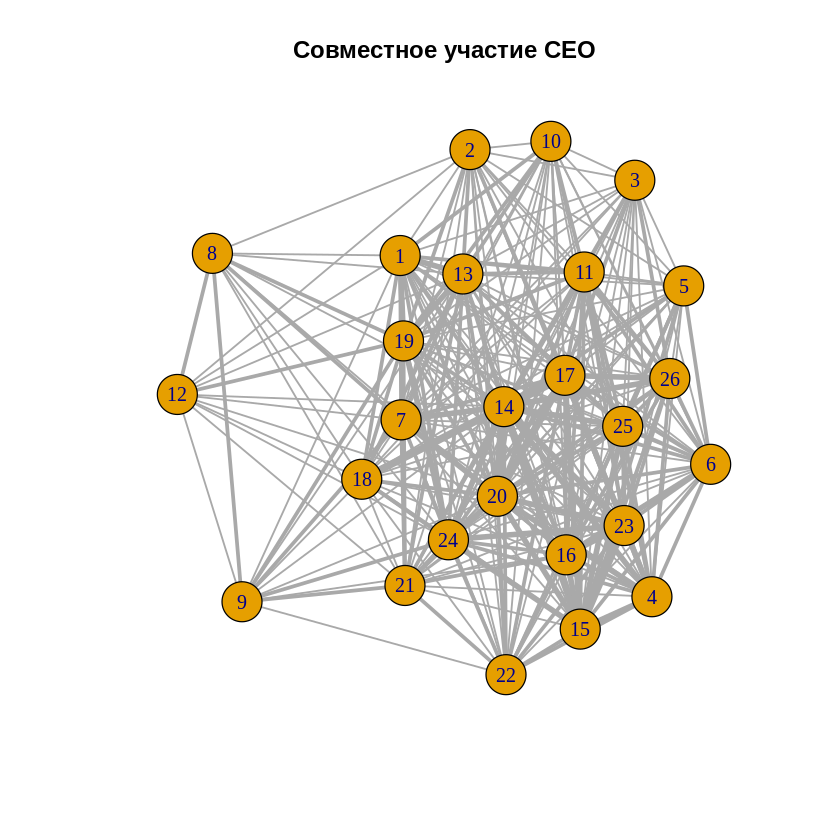

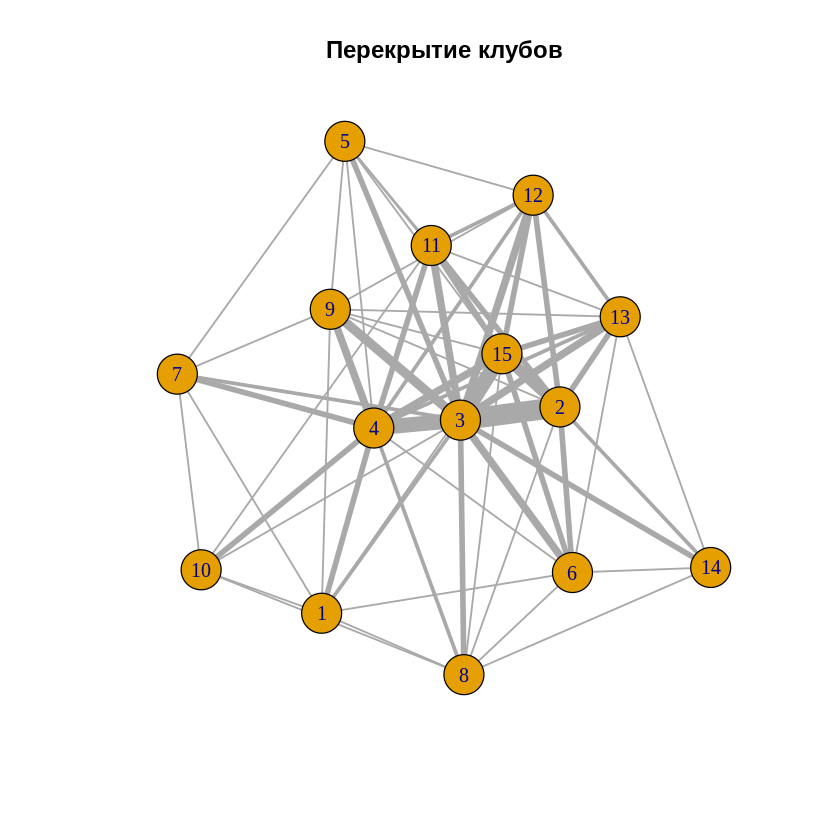

In [14]:
pr <- bipartite_projection(graph2, multiplicity = TRUE)

ceo_net   <- pr$proj1
club_net  <- pr$proj2

A_ceo <- as_adjacency_matrix(ceo_net, sparse = FALSE, attr = "weight")

A_club <- as_adjacency_matrix(club_net, sparse = FALSE, attr = "weight")

A_ceo
A_club

plot(ceo_net,
     edge.width = E(ceo_net)$weight * 1.5,
     main = "Совместное участие CEO"
)

plot(club_net,
     edge.width = E(club_net)$weight * 1.5,
     main = "Перекрытие клубов"
)

**Выводы:** анализ совместных участий достаточно затруднителен с использованием графа и его матрицы. Про клубы же можно сказать, что клуб 3 однозначно имеет гкрайне высокие значения в своем ряду, это говорит о том, что он значительно перекрывает другие. С другой стороны, клуб номер 7, 1 и 5 почти не перекрываются с другими.

### 9. Вычислить степень участия для каждого актора, а также среднее количество событий, с которыми актор аффилирован. Сделать выводы.

In [15]:
participation <- rowSums(as.matrix(table2))
mean_participation <- mean(participation)

cat("Степени участия:")
participation
cat("Среднее количество событий:")
round(mean_participation, 4)

Степени участия:

[1] 3 3 2 3 3 3 4 3 4 2 3 2 4 7 5 5 6 5 5 5 3 3 4 5 3 3

Среднее количество событий:

[1] 3.7692

**Вывод:** акторы сети принимают участие в среднем в 3ъ-4х клубах, и не меньше чем в двух. Некоторые CEO учавствуют в 5,6 клубах.

### 10. Вычислить размер и средний размер для каждого события. Сделать выводы.

In [16]:
participation2 <- colSums(as.matrix(table2))
mean_participation2 <- mean(participation2)


print(participation2)
cat("Среднее количество размера событий:")
round(mean_participation2, 4)

 V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 
  3  11  22  12   3   4   4   4   6   3   4   5   5   3   9 
Среднее количество размера событий:

[1] 6.5333

**Вывод:** Размер событий крайне неравномерный, мы видим что клубы 2, 3, 4 и 15 преобладают над остальными.

### 11. Вычислить плотность для отношения совместного участия акторов и отношения перекрытия. Проинтерпретируйте полученные значения.

In [17]:
cat("Плотность сети совместного участия CEO: ", round(edge_density(ceo_net), 4), "\n")
cat("Плотность сети перекрытия клубов:       ", round(edge_density(club_net), 4), "\n")

Плотность сети совместного участия CEO:  0.8738 
Плотность сети перекрытия клубов:        0.6286 


**Вывод:** сети демонстрируют крайне высокую плотность. Эти показатели можно инерптировать следующим образом: Два случайно взятых CEO с вероятностью в 87% состоят в одном клубе.

### 12. Определить диаметр сети аффилированности.

In [18]:
cat("Диаметр сети: ", diameter(graph2), "\n")
cat("Диаметр сети совместного участия CEO: ", diameter(ceo_net), "\n")
cat("Диаметр сети перекрытия клубов: ", diameter(club_net), "\n")

Диаметр сети:  5 
Диаметр сети совместного участия CEO:  2 
Диаметр сети перекрытия клубов:  4 


### 13. Для каждых пар событий определить (логарифм) отношение шансов. Сделать выводы.

In [19]:
n_ceo <- nrow(as.matrix(table2))
n_clubs <- ncol(as.matrix(table2))


# Матрица для хранения log(OR)
logOR <- matrix(0, nrow = n_clubs, ncol = n_clubs)

mat <- as.matrix(table2)

for (i in 1:(n_clubs - 1)) {
  for (j in (i + 1):n_clubs) {
    a <- sum(mat[, i] & mat[, j]) + 0.5   # в обоих клубах
    b <- sum(mat[, i] & !mat[, j]) + 0.5  # только в i
    c <- sum(mat[, j] & !mat[, i]) + 0.5  # только в j
    d <- sum(!mat[, i] & !mat[, j]) + 0.5 # ни в одном

    or <- (a * d) / (b * c)
    logOR[i, j] <- logOR[j, i] <- round(log(or), 2)
  }
}
print(logOR)

       [,1]  [,2]  [,3]  [,4]  [,5]  [,6]  [,7]  [,8]  [,9] [,10] [,11] [,12]
 [1,]  0.00 -1.86 -1.26  2.37 -0.18  1.26  1.26  1.26  0.70  1.64 -0.48 -0.73
 [2,] -1.86  0.00  2.20 -1.98 -0.26  1.38 -2.20 -0.67 -1.30 -1.86  1.38  0.80
 [3,] -1.26  2.20  0.00 -2.73  0.48  0.78 -2.10 -0.87 -0.31 -2.66  0.78 -0.57
 [4,]  2.37 -1.98 -2.73  0.00 -0.43 -0.85  1.20  0.17  0.97  2.37  1.20 -0.25
 [5,] -0.18 -0.26  0.48 -0.43  0.00 -0.48  1.26 -0.48  0.70 -0.18  1.26  0.96
 [6,]  1.26  1.38  0.78 -0.85 -0.48  0.00 -0.78  0.87 -1.27 -0.48 -0.78 -1.04
 [7,]  1.26 -2.20 -2.10  1.20  1.26 -0.78  0.00 -0.78  0.31  1.26 -0.78 -1.04
 [8,]  1.26 -0.67 -0.87  0.17 -0.48  0.87 -0.78  0.00 -1.27  1.26 -0.78 -1.04
 [9,]  0.70 -1.30 -0.31  0.97  0.70 -1.27  0.31 -1.27  0.00 -0.96 -1.27  0.00
[10,]  1.64 -1.86 -2.66  2.37 -0.18 -0.48  1.26  1.26 -0.96  0.00  1.26 -0.73
[11,] -0.48  1.38  0.78  1.20  1.26 -0.78 -0.78 -0.78 -1.27  1.26  0.00  1.72
[12,] -0.73  0.80 -0.57 -0.25  0.96 -1.04 -1.04 -1.04  0.00 -0.7

При подсчете шансов была добавлена поправка Холдейна-Энскомба, чтобы избавиться от деления на ноль.

**Вывод:** в матрице видно большое количество значительно ненулевых ячеек, это говорит о том, что членство в различных клубах нельзя считать независимым. В целом тренды смешаные, отрицательные числа показывают нежелание членов одного клуба вступать в другой клую, а положительные наоборот тенденцию к совсместному членству.

## Выводы

Был проведен комплексный анализ двух сетей.

Первая сеть - сеть деловых отношений между некоторым множеством семей была рассмотрена с целью выяления различных сообществ. Сеть была уверенно разделена на две части (при условии исключения изолированных семей, которые не учавствуют в сделках), выявлена ее по большей части (за исключением посреднечества) однородная структура централизации. Найдены ключевые семьи - medici и barbadori - точки сочленения сети.

Вторая сеть - сеть участия CEO в некоторых клубах была рассмотрена как двудольный граф. Выялена значительная неравномерность распределения CEO по клубам, установлены самые активные CEO. Логарифм отношения шансов позволяет заключить, что некоторые клубы исключают друг друга, а некоторые наоборот имеют совместных членов.